In [42]:
import pandas as pd

df = pd.read_csv('/content/listings-2.csv')
df.head()


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,621960198566758900,https://www.airbnb.com/rooms/621960198566758900,20250302010353,2025-03-02,city scrape,The Historic Jesse Buel Farmhouse w/ Heated Pool,4800ft of living space and an epic backyard ma...,"Walkable, Safe and quiet",https://a0.muscache.com/pictures/dd1a2e33-d50b...,382970529,...,5.00,4.87,5.00,NaN,f,12,2,10,0,0.47
1,932642358896439621,https://www.airbnb.com/rooms/932642358896439621,20250302010353,2025-03-02,city scrape,Stylish top floor apt w/parking,The whole group will enjoy easy access to ever...,Pine Hills Neighborhood in Albany NY is full o...,https://a0.muscache.com/pictures/prohost-api/H...,232967878,...,4.84,4.65,4.76,NaN,f,23,23,0,0,1.88
2,53567589,https://www.airbnb.com/rooms/53567589,20250302010353,2025-03-02,city scrape,Private Garden Apt in Downtown Albany|Pets All...,Discover Lark Street - A Hip Albany Neighborho...,If you visit Albany’s Capital Region without s...,https://a0.muscache.com/pictures/2e5b6926-a177...,433096110,...,4.96,4.79,4.86,NaN,f,4,4,0,0,6.40
3,20671966,https://www.airbnb.com/rooms/20671966,20250302010353,2025-03-02,city scrape,The Metropolitan,This full apartment is located on the 3rd floo...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,98744672,...,4.98,4.93,4.87,NaN,f,8,2,6,0,0.51
4,24606880,https://www.airbnb.com/rooms/24606880,20250302010353,2025-03-02,city scrape,The Western Suite,"Located in a huge Victorian, this beautiful su...",NaN,https://a0.muscache.com/pictures/e8183a7b-a392...,98744672,...,4.96,4.96,4.88,NaN,f,8,2,6,0,0.62


In [43]:
print(df.columns)


Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [44]:
#clean the price column
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)


In [45]:
#check missing values
df.isnull().sum().sort_values(ascending=False).head(20)


,0
license,424
calendar_updated,424
neighbourhood_group_cleansed,424
neighbourhood,218
neighborhood_overview,218
host_about,194
host_location,91
host_neighbourhood,67
last_review,58
first_review,58


In [46]:
# Fill rating-related missing values
df['review_scores_rating'].fillna(df['review_scores_rating'].mean(), inplace=True)

# Fill number_of_reviews with 0 if null (means no reviews)
df['number_of_reviews'].fillna(0, inplace=True)

# Drop rows with many missing fields
df.dropna(subset=['bedrooms', 'bathrooms'], inplace=True)


<ipython-input-46-c5b1d9a05772>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['review_scores_rating'].fillna(df['review_scores_rating'].mean(), inplace=True)
<ipython-input-46-c5b1d9a05772>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].meth

In [48]:
#convert categorical features
#df = pd.get_dummies(df, columns=['room_type', 'neighbourhood_cleansed'], drop_first=True)
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

# Optional: keep only realistic prices
df = df[df['price'] < 1000]

ValueError: Could not interpret value `room_type` for `x`. An entry with this name does not appear in `data`.

<Figure size 800x400 with 0 Axes>

In [49]:
#simplifying amenities column
#Count total number of amenities:
df['amenity_count'] = df['amenities'].apply(lambda x: len(x.split(',')))
df['has_wifi'] = df['amenities'].str.contains('Wifi').astype(int)


In [50]:
#Feature Selection
#Pick your input features (X) and target variables (y):
features = [
    'bedrooms', 'bathrooms', 'minimum_nights', 'number_of_reviews',
    'availability_365', 'review_scores_rating', 'amenity_count',
    'has_wifi',  # if extracted
    # plus dummies like room_type_Entire home/apt, etc.
]

X = df[features]
y = df['price']


In [51]:
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

# Optional: keep only realistic prices
df = df[df['price'] < 1000]

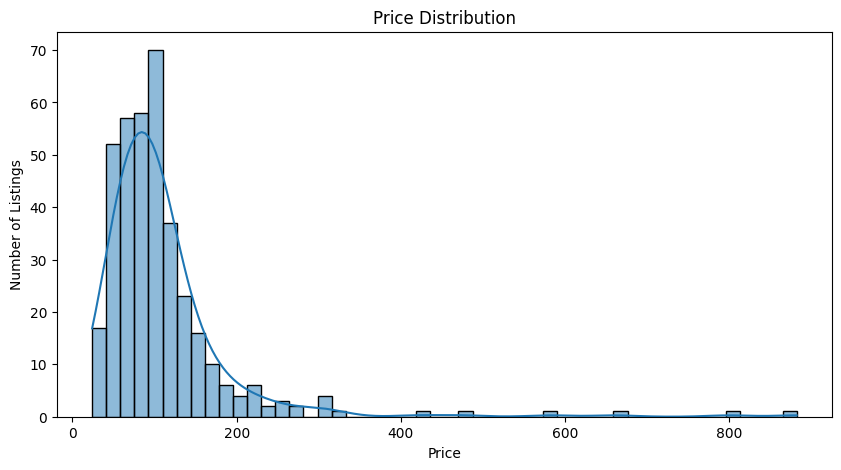

In [52]:
#EDA
#Plot Price Distribution
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Number of Listings')
plt.show()



<Axes: xlabel='price'>

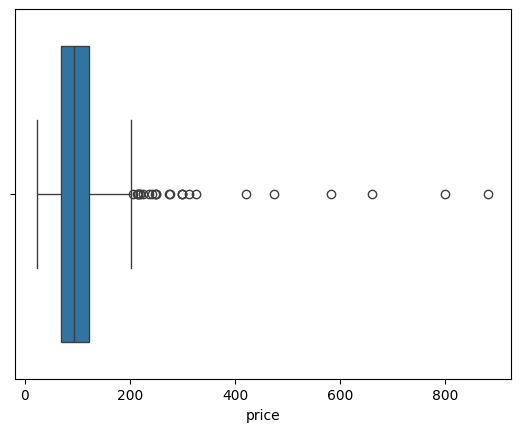

In [53]:
sns.boxplot(x=df['price'][df['price'] < 1000])

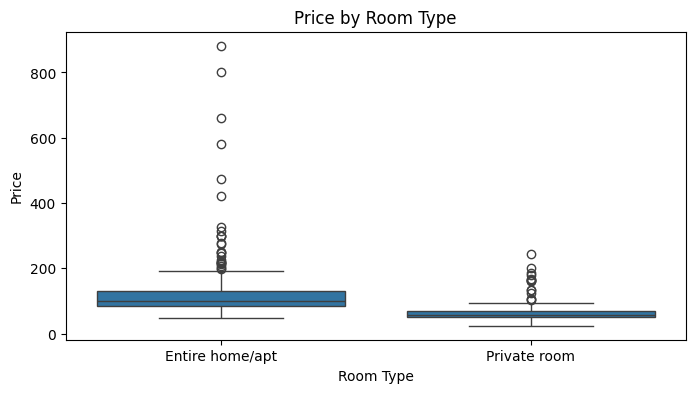

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.boxplot(x='room_type', y='price', data=df)
plt.title('Price by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.show()


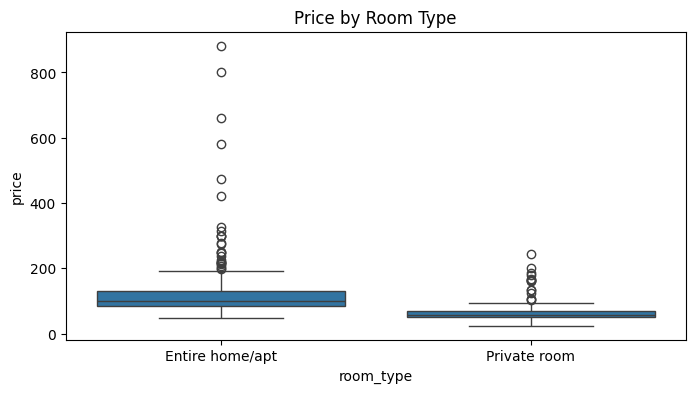

In [55]:
#price vs room type
plt.figure(figsize=(8, 4))
sns.boxplot(x='room_type', y='price', data=df)
plt.title('Price by Room Type')
plt.show()


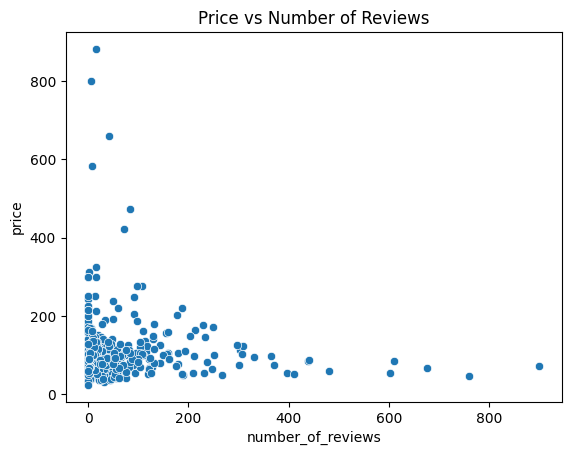

In [56]:
#price vs no.of reviews
sns.scatterplot(x='number_of_reviews', y='price', data=df)
plt.title('Price vs Number of Reviews')
plt.show()


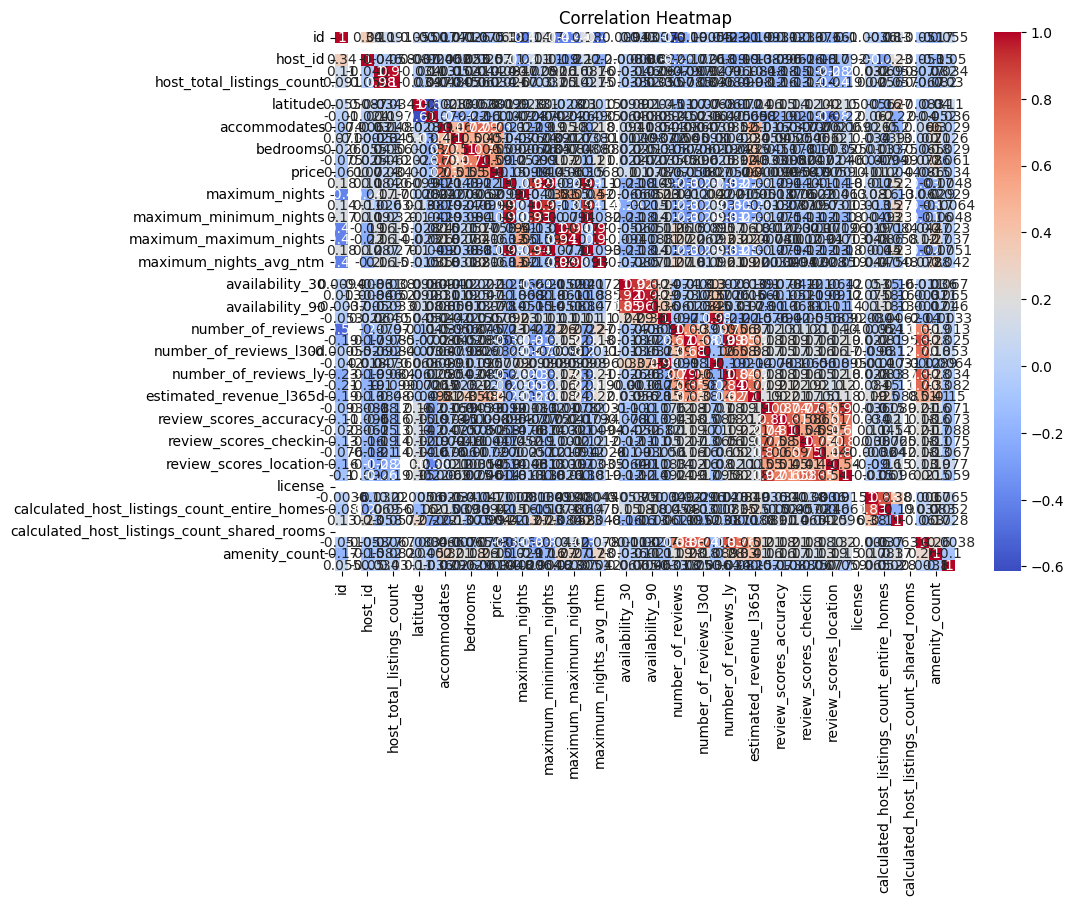

In [57]:
#correlation heatmap
numeric_cols = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(10, 7))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


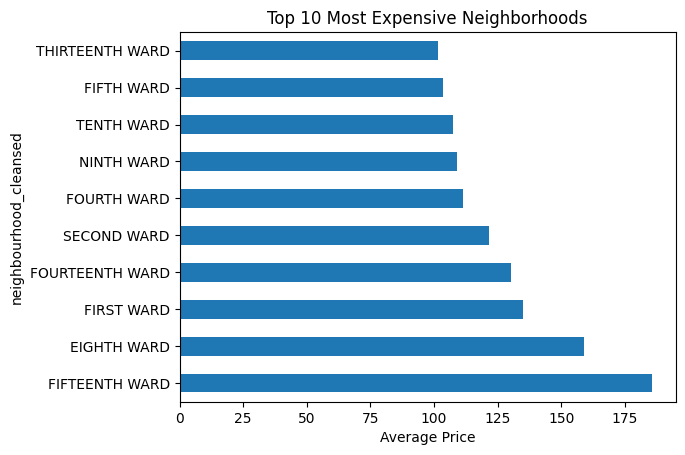

In [58]:
#group by neighbourhood
avg_price_by_neigh = df.groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending=False).head(10)
avg_price_by_neigh.plot(kind='barh')
plt.title('Top 10 Most Expensive Neighborhoods')
plt.xlabel('Average Price')
plt.show()


In [59]:
features = [
    'bedrooms', 'bathrooms', 'minimum_nights',
    'number_of_reviews', 'availability_365',
    'review_scores_rating'
    # Add any engineered features or one-hot encoded columns too
]

X = df[features]
y = df['price']


In [61]:
# train & test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [66]:
#Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Linear Regression")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("R² Score:", r2_score(y_test, y_pred_lr))



Linear Regression
RMSE: 95.81857323513557
MAE: 46.280957454007016
R² Score: 0.1463897577338542


In [71]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("R² Score:", r2_score(y_test, y_pred_rf))

Random Forest
RMSE: 92.58843254604398
MAE: 40.578799999999994
R² Score: 0.2029718111029828


In [72]:
#XG Boost Regressor
!pip install xgboost

from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=100, random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("XGBoost")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_xgb)))
print("MAE:", mean_absolute_error(y_test, y_pred_xgb))
print("R² Score:", r2_score(y_test, y_pred_xgb))


XGBoost
RMSE: 99.96550995449329
MAE: 46.31215927124023
R² Score: 0.07090400192786717


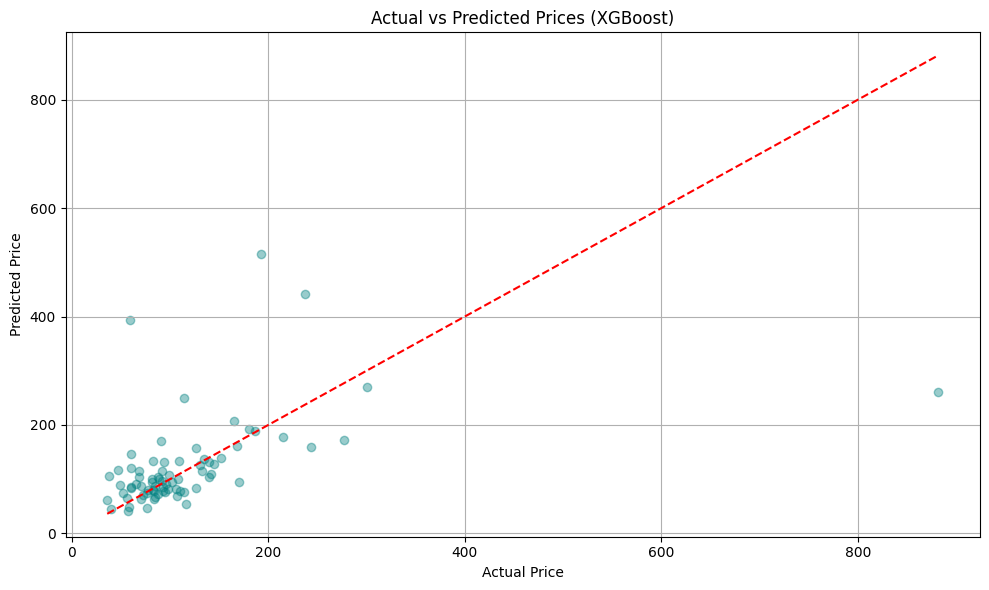

In [70]:
import matplotlib.pyplot as plt

#using XGBoost predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgb, alpha=0.4, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices (XGBoost)")
plt.grid(True)
plt.tight_layout()
plt.show()


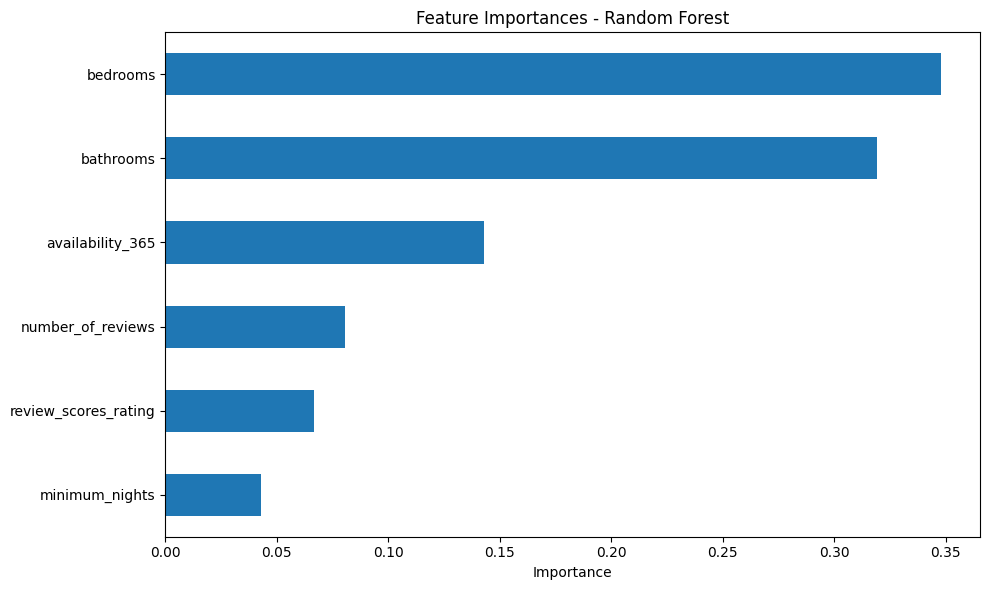

In [73]:
#plot feature importance
#Random Forest
import pandas as pd
import seaborn as sns

importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(10, 6), title='Feature Importances - Random Forest')
plt.xlabel("Importance")
plt.tight_layout()
plt.show()


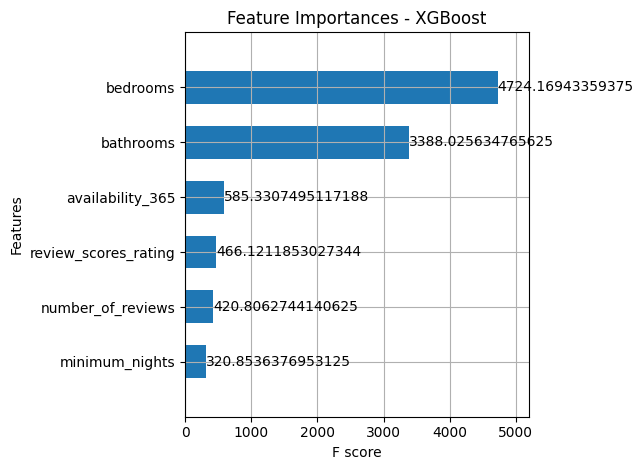

In [74]:
#XG Boost
from xgboost import plot_importance

plot_importance(xgb, height=0.6, importance_type='gain', max_num_features=10)
plt.title('Feature Importances - XGBoost')
plt.tight_layout()
plt.show()


In [75]:
import joblib

# Save the best model (XGBoost in this case)
joblib.dump(xgb, 'airbnb_price_predictor.pkl')


['airbnb_price_predictor.pkl']

In [76]:
from google.colab import files
files.download('airbnb_price_predictor.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>